한글 워드클라우드 - 여친 선물
- KoNLPy 설치
-Jpype download(https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype)
- 본인에 파이썬 버전에 맞게 설치(예:python 3.8)
- download 프로그램이 있는 디렉토리로 이동
-

In [27]:
import konlpy
konlpy.__version__

'0.5.2'

In [28]:
from konlpy.tag import Okt
okt = Okt()
okt.nouns('해당 에러가 발생하는것을 알 수 있다')

['해당', '에러', '발생', '알', '수']

여친선물 - 워드 클라우드 만들기

In [29]:
with open('data/gift.txt', encoding='utf8') as file:
    gift_text = file.read()

In [30]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [31]:
# 한글 이외의 글자는 제거
import re
new_tokens = []
for token in tokens:
    new_token= re.sub('[^가-힣 ]', '', token)
    if new_token:           #''는 포함시키지 말것
        new_tokens.append(new_token)

In [32]:
#한글 폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family']= 'Malgun Gothic'

- 엉터리 단어 제거 - 수동으로 처리

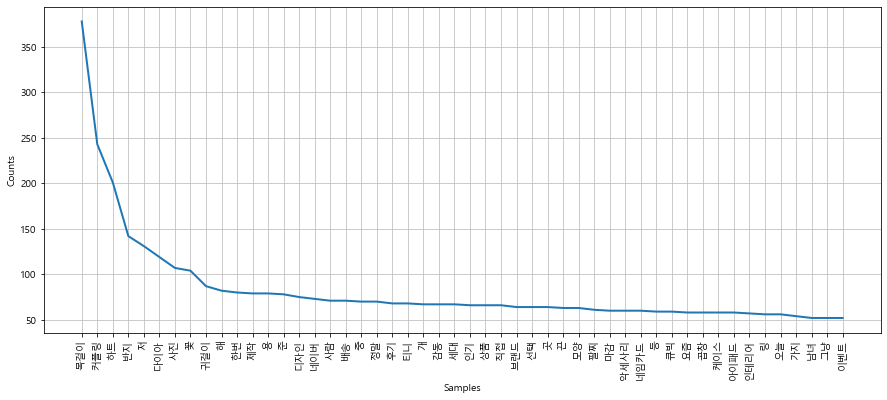

In [39]:
import nltk
gf_gift = nltk.Text(new_tokens, name = '여친선물')
plt.figure(figsize=(15, 6))
gf_gift.plot(50)
plt.show()

In [38]:
#stop_list = ['선물', '추천']
stop_words = '요 더 사용 구매 고급 판매 때 참고 머리 하나 선물 추천 거 것 가격 수 여친 커플 가능 제품 여자친구 체 제 사랑 생각 여자 분'
stop_list = stop_words.split()

'''쓰지말것
new_token_list = []
for token in new_tokens:
    if token not in stop_list:
        new_token_list.append(token)
new_tokens = new_token_list'''

new_tokens= [token for token in tokens if token not in stop_list]

- 워드 클라우드 그리기

In [40]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [41]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('목걸이', 378),
 ('커플링', 243),
 ('하트', 201),
 ('반지', 142),
 ('저', 131),
 ('다이아', 119),
 ('사진', 107),
 ('꽃', 104),
 ('귀걸이', 87),
 ('해', 82)]

In [42]:
wc=WordCloud(
    font_path='c:/windows/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white'
    ).generate_from_frequencies(dict(data))

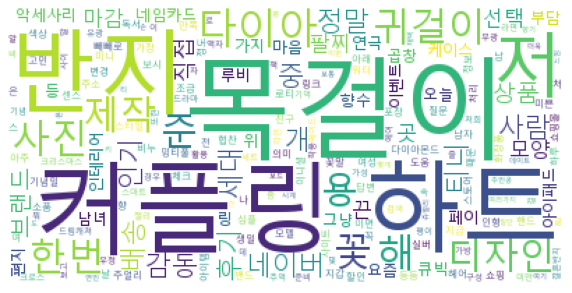

In [46]:
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

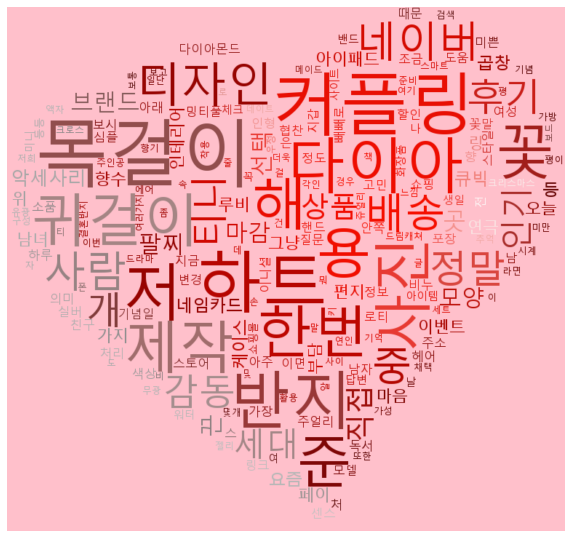

In [53]:
#하트 그림에 표시하기
from wordcloud import ImageColorGenerator
mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

wc=WordCloud(
   font_path='c:/windows/Fonts/malgun.ttf',
   relative_scaling=0.2, mask=mask,
   background_color='pink',
   min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array

plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()